# Handwritten Digits Classification

[Notebook on Colab](https://colab.research.google.com/drive/1yYDCI5XoXC4Kg3mocsagOCQ__09qtyUV).

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading Data

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y[:5]

array([5, 0, 4, 1, 9], dtype=int8)

(-0.5, 27.5, 27.5, -0.5)

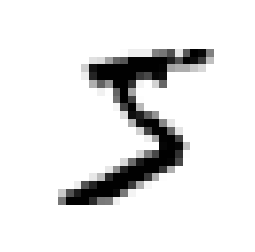

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

## Creating a test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
X_train.shape

(56000, 784)

In [10]:
X_test.shape

(14000, 784)

In [11]:
y_train.shape

(56000,)

In [12]:
y_test.shape

(14000,)

## Creating and training the model

In [16]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\sozyk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Using the model to recognize digits

In [17]:
predicted_classes = model.predict(X_test)

In [18]:
predicted_classes[:10]

array([2, 2, 7, 3, 6, 1, 7, 9, 4, 8], dtype=int8)

In [19]:
y_test[:10]

array([2, 2, 9, 3, 6, 1, 5, 9, 2, 8], dtype=int8)

(-0.5, 27.5, 27.5, -0.5)

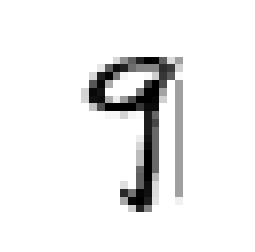

In [21]:
some_digit = X_test[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

## Evaluating the quality of the model

In [24]:
accuracy = accuracy_score(y_test,predicted_classes)
accuracy

0.926

In [25]:
confusion_matrix(y_test,predicted_classes)

array([[1340,    0,    8,    4,    2,    6,    8,    2,   13,    2],
       [   0, 1526,    7,    4,    0,    4,    1,    5,   14,    2],
       [   9,   19, 1254,   21,   19,    5,   19,   15,   27,    5],
       [   6,    3,   27, 1327,    3,   43,    1,    9,   25,   14],
       [   5,    5,    8,    2, 1254,    2,    7,    1,   12,   43],
       [  13,    6,    9,   39,   19, 1043,   31,    8,   60,   11],
       [  14,    5,    4,    0,   11,   17, 1296,    1,    4,    0],
       [   2,    2,   16,    3,   11,    3,    1, 1406,    3,   44],
       [   6,   28,   15,   29,    3,   34,    9,    5, 1232,   19],
       [  12,    7,    1,    9,   20,    6,    0,   47,   12, 1286]],
      dtype=int64)

## Exercises

1. Print accuracy and confusion_matrix for train dataset. Compare accuracy and confusion_matrix for test and train datasets.
2. Find examples of digits that was classified incorrectly. Do you have some ideas why it happens?
3. Use k-nn Classifier for digits recognition.
4. Try to recognize your own digits.